<a href="https://colab.research.google.com/github/Crispis723/numpy/blob/main/optimizacion_aeropuertaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick
import matplotlib.pyplot as plt

print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')

Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de scikit-learn (sklearn): 1.6.1
Versión de seaborn: 0.13.2
Versión de yellowbrick: 1.5


In [116]:
datos= pd.read_csv('/content/flights.csv')
datos.shape

(71175, 11)

In [117]:
datos.head() # el dilay  y arrival time  estan en tiempo toca multiplicar por  60

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [118]:
datos.info() # en el tange index mira si hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [119]:
datos.describe() #coun conteo, mean promedio, std es el desvio standar,min valor minimo,  hasta el 25% sario adelantado. Cuantiles

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [120]:
datos.describe(include='O')#añade las  estadistica descriptiva de las variables categorixas

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


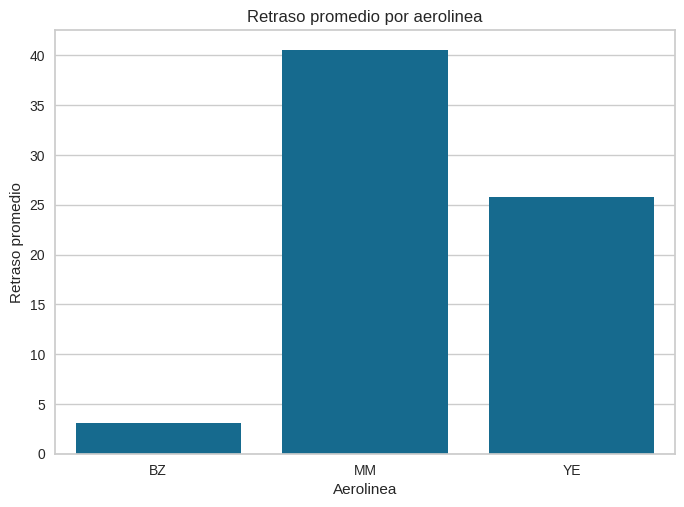

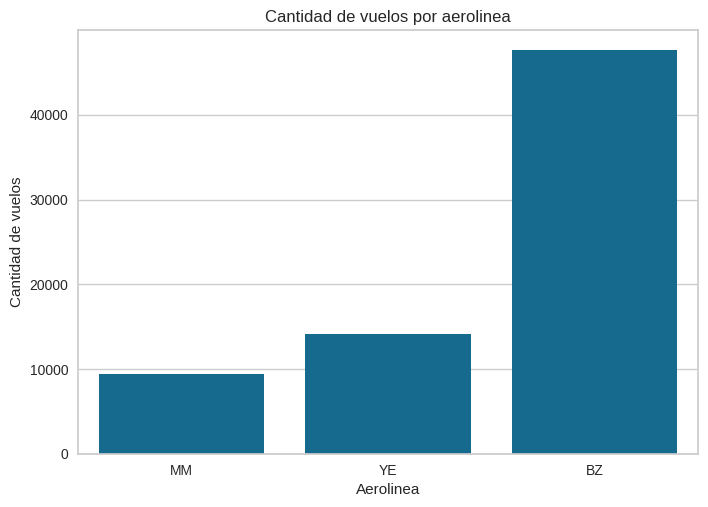

In [121]:
avg_delate =datos.groupby('airline')['delay'].mean().reset_index()
#agrupamos con gropbu para aerolinea, usamos delay como variable respuesta, usamos el promedio y usamos reset para actualizar
sns.barplot(x='airline',y='delay',data=avg_delate)
plt.title('Retraso promedio por aerolinea')
plt.xlabel('Aerolinea')
plt.ylabel('Retraso promedio')
plt.show()


sns.countplot(x='airline',data=datos)
plt.title('Cantidad de vuelos por aerolinea')
plt.xlabel('Aerolinea')
plt.ylabel('Cantidad de vuelos')
plt.show()

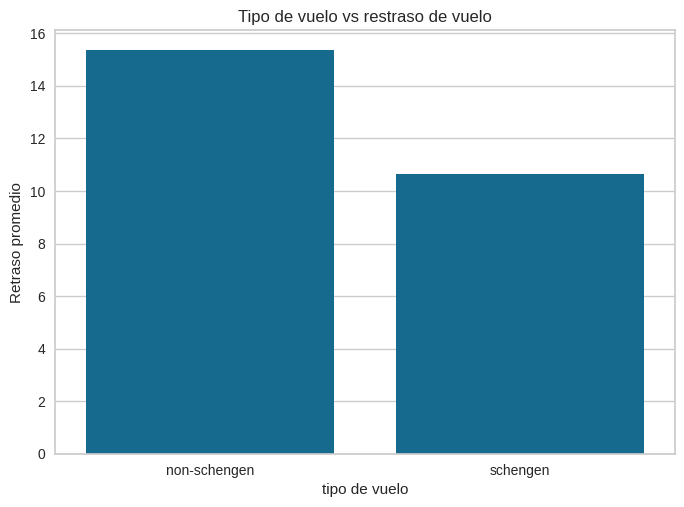

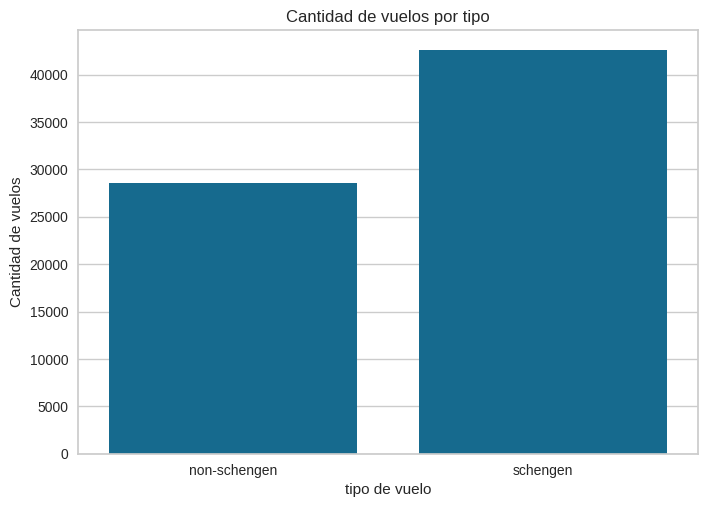

In [122]:
avg_delate =datos.groupby('schengen')['delay'].mean().reset_index()
#agrupamos con gropbu para aerolinea, usamos delay como variable respuesta, usamos el promedio y usamos reset para actualizar
sns.barplot(x='schengen',y='delay',data=avg_delate)
plt.title('Tipo de vuelo vs restraso de vuelo')
plt.xlabel('tipo de vuelo')
plt.ylabel('Retraso promedio')
plt.show()


sns.countplot(x='schengen',data=datos)
plt.title('Cantidad de vuelos por tipo')
plt.xlabel('tipo de vuelo')
plt.ylabel('Cantidad de vuelos')
plt.show()

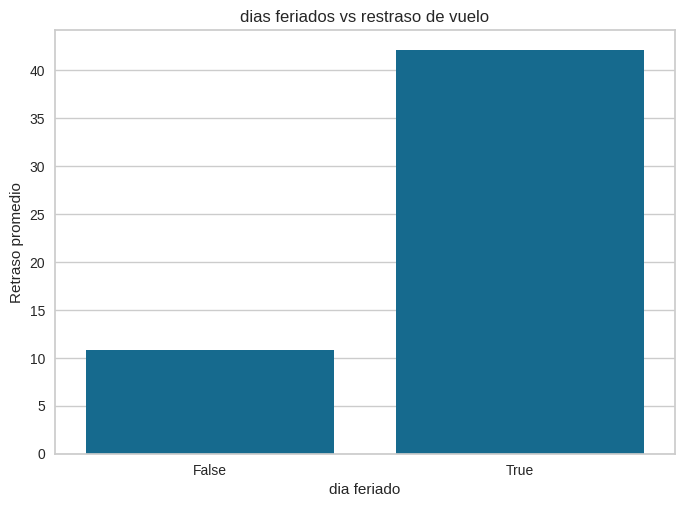

In [123]:
avg_delate =datos.groupby('is_holiday')['delay'].mean().reset_index()
#agrupamos con gropbu para aerolinea, usamos delay como variable respuesta, usamos el promedio y usamos reset para actualizar
sns.barplot(x='is_holiday',y='delay',data=avg_delate)
plt.title('dias feriados vs restraso de vuelo')
plt.xlabel('dia feriado')
plt.ylabel('Retraso promedio')
plt.show() # ctrl shif enter para todas las ocurencias

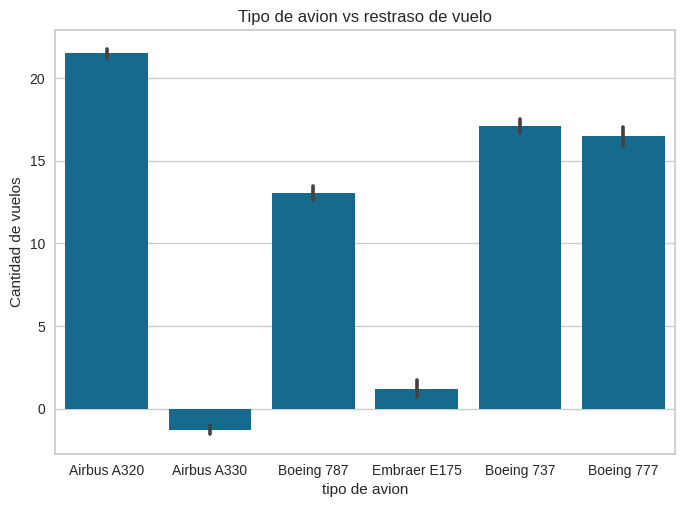

In [124]:
order = datos['aircraft_type'].value_counts().index
#ordenas de maypr a menor cada indice en este ejmplo de la que tiene mas cantida a menos la guardamos en order
sns.barplot(x='aircraft_type',y='delay',data=datos,order=order)
plt.title('Tipo de avion vs restraso de vuelo')
plt.xlabel('tipo de avion')
plt.ylabel('Cantidad de vuelos')
plt.show()

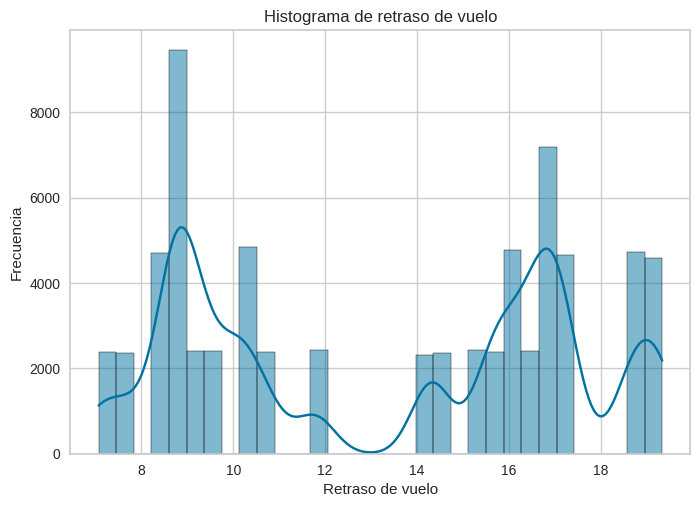

In [125]:
sns.histplot(data=datos, x='arrival_time', kde=True) # KDE es curva de densidad
plt.title('Histograma de retraso de vuelo')
plt.xlabel('Retraso de vuelo')
plt.ylabel('Frecuencia')
plt.show()

## Regla de frechman and Diaconi

In [126]:
def ancho_bin(df,columna):
  q75 , q25 = np.percentile(df[columna],[75,25])
  iqr = q75-q25
  ancho = 2*(iqr)*np.power((len(df[columna])),-1/3)
  return ancho

<Axes: xlabel='arrival_time', ylabel='Count'>

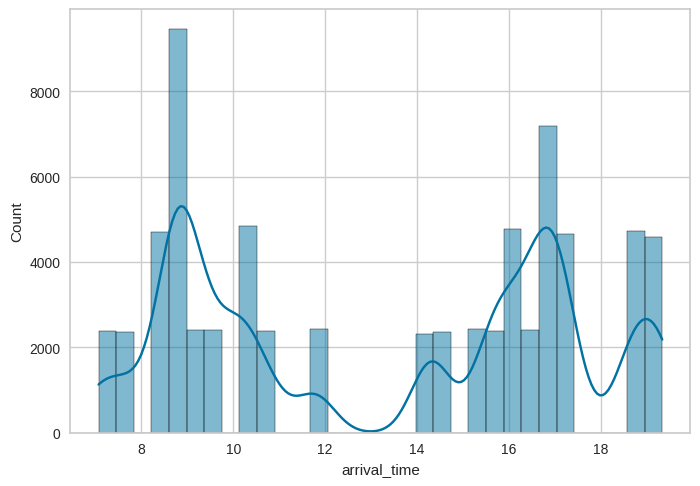

In [127]:
bin_width = ancho_bin(datos,'arrival_time')
sns.histplot(data=datos, x='arrival_time', kde=True, binwidth=bin_width)
# KDE es curva de densidad # bind width ancho de las barras

<Axes: xlabel='departure_time', ylabel='Count'>

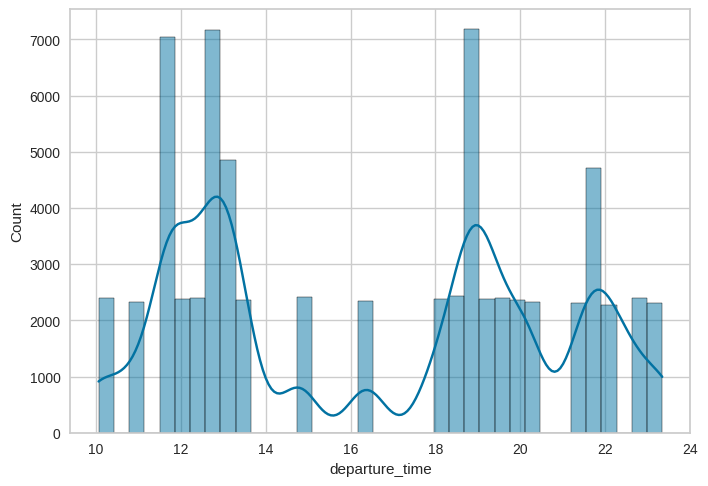

In [128]:
bin_width = ancho_bin(datos,'departure_time')
sns.histplot(data=datos, x='departure_time', kde=True, binwidth=bin_width)
# KDE es curva de densidad # bind width ancho de las barras

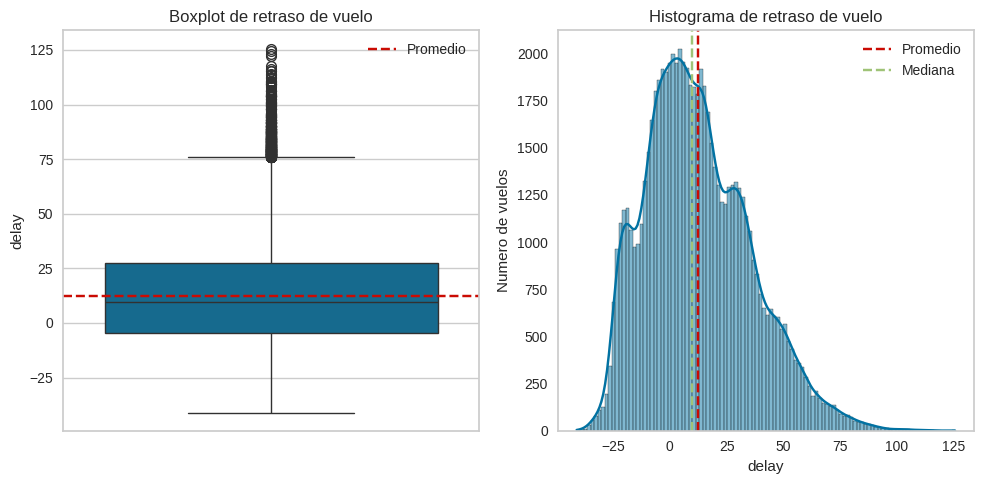

In [129]:
atraso_prom = datos['delay'].mean()
atrado_mendiana = datos['delay'].median()

fig, ax =plt.subplots(1,2,figsize=(10,5))

sns.boxplot(data = datos , y = 'delay', ax=ax[0])
ax[0].set_title('Boxplot de retraso de vuelo')
ax[0].axhline(y=atraso_prom,color='r',linestyle='--', label='Promedio') #linea horizontal promedio
ax[0].legend()

bin_width=ancho_bin(datos,'delay')
sns.histplot(data = datos , x = 'delay', ax=ax[1], kde = True, binwidth= bin_width)
plt.ylabel('Numero de vuelos')
plt.grid(False) # quitar cuadrialla
ax[1].set_title('Histograma de retraso de vuelo')
ax[1].axvline(x=atraso_prom,color='r',linestyle='--', label='Promedio') #linea horizontal promedio
ax[1].axvline(x=atrado_mendiana,color='g',linestyle='--', label='Mediana') #linea horizontal promedio
ax[1].legend()
plt.tight_layout()
#axvline  vertical axhline horizontal

plt.show()

#Clase 2


In [130]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [131]:
datos['date'] =datos['year'].astype(str)+'-'+(datos['day']+1).astype(str)
datos['date'] = pd.to_datetime(datos['date'], format='%Y-%j')
datos.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277,2022-12-31
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348,2022-12-31
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080,2022-12-31
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [132]:
datos['is_weekend'] = datos['date'].dt.weekday.isin([5,6])
datos['day_name'] = datos['date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
18912,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,165,2013,False,-7.609579,2013-06-15,True,Saturday
48440,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,309,2018,False,32.611384,2018-11-06,False,Tuesday
13160,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,147,2012,False,-6.649798,2012-05-27,True,Sunday
65152,1,BZ,Airbus A320,non-schengen,CNU,15.496519,18.496519,328,2021,False,37.819857,2021-11-25,False,Thursday
48477,23,YE,Embraer E175,schengen,TCY,18.801235,21.801235,311,2018,False,7.302744,2018-11-08,False,Thursday


In [133]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [134]:
import warnings
warnings.filterwarnings('ignore') # ignorar las advertencias

In [135]:
datos['schengen'] = datos['schengen'].replace({'non-schengen':0,'schengen':1})
datos['is_holiday'] = datos['is_holiday'].replace({False:0,True:1})
datos['is_weekend'] = datos['is_weekend'].replace({False:0,True:1})
datos.sample(5)


,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
33296,27,BZ,Airbus A320,1,AUZ,14.376052,16.376052,29,2016,0,-1.695678,2016-01-30,1,Saturday
57237,22,YE,Airbus A320,0,MWL,8.794147,11.794147,165,2020,0,26.298188,2020-06-14,1,Sunday
22040,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,9,2014,0,-16.084292,2014-01-10,0,Friday
42008,10,YE,Airbus A320,0,TCY,8.939996,11.939996,245,2017,0,59.313692,2017-09-03,1,Sunday
50489,10,YE,Airbus A320,0,TCY,8.939996,11.939996,80,2019,0,34.112047,2019-03-22,0,Friday


In [136]:
categoricas = ['airline','aircraft_type','origin','day_name']

pd.get_dummies(data=datos,columns=categoricas,dtype=int).head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [137]:
datos_cod=pd.get_dummies(data=datos,columns=categoricas,dtype=int)
datos_cod.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
64156,26,0,8.885071,10.885071,262,2021,0,33.973658,2021-09-20,0,...,1,0,0,0,1,0,0,0,0,0
29238,4,1,11.781391,14.781391,124,2015,0,-23.097093,2015-05-05,0,...,1,0,0,0,0,0,0,0,1,0
69048,3,1,18.635384,22.635384,223,2022,0,-1.027021,2022-08-12,0,...,0,1,0,1,0,0,0,0,0,0
20727,2,1,19.196804,22.196804,286,2013,0,14.750654,2013-10-14,0,...,0,0,1,0,1,0,0,0,0,0
16616,30,1,8.923441,12.923441,12,2013,0,-16.838331,2013-01-13,1,...,0,0,0,0,0,0,1,0,0,0


In [138]:
datos[['arrival_time','departure_time']].corr()#corelacion -1  a 1

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [139]:
df = datos_cod.drop(columns=['flight_id','departure_time','day','year','date'])
df.sample(10)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
22678,0,19.341235,0,7.634467,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
61479,1,7.065594,0,24.580718,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44671,0,10.172731,0,-22.601806,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
56829,1,7.065594,0,20.254044,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
40049,1,9.668655,0,3.785726,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
33507,1,11.781391,0,-24.270337,1,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
53644,0,8.939996,0,22.364940,1,0,0,1,1,0,...,1,0,0,0,0,1,0,0,0,0
3968,1,15.729617,0,9.850344,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
29088,0,10.172731,0,-25.252358,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
33703,1,19.196804,0,29.846336,0,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0


### onehotenconder

In [140]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categoricas = ['airline','aircraft_type','origin','day_name']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
    categoricas),
    remainder='passthrough')

##ColumnTransformer que aplica el OneHotEncoder a las columnas especificadas en categoricas. El argumento handle_unknown='ignore' significa que
# el OneHotEncoder ignorará cualquier categoría desconocida que pueda aparecer durante la transformación. El argumento
#remainder='passthrough' significa que cualquier columna que no esté especificada para la transformación será pasada a través sin cambios.


datos = one_hot_enc.fit_transform(datos)

#Aquí, estamos aplicando la transformación al DataFrame datos. El método fit_transform ajusta el transformador a los datos y luego transforma los datos.
datos = pd.DataFrame(datos, columns=one_hot_enc.get_feature_names_out())
#Aquí, estamos convirtiendo los datos transformados de nuevo a un DataFrame. También estamos definiendo los nombres de las columnas para que
#sean los nombres de características de salida del ColumnTransformer.
datos

,onehotencoder__airline_BZ,onehotencoder__airline_MM,onehotencoder__airline_YE,onehotencoder__aircraft_type_Airbus A320,onehotencoder__aircraft_type_Airbus A330,onehotencoder__aircraft_type_Boeing 737,onehotencoder__aircraft_type_Boeing 777,onehotencoder__aircraft_type_Boeing 787,onehotencoder__aircraft_type_Embraer E175,onehotencoder__origin_AUZ,...,remainder__flight_id,remainder__schengen,remainder__arrival_time,remainder__departure_time,remainder__day,remainder__year,remainder__is_holiday,remainder__delay,remainder__date,remainder__is_weekend
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3,1,18.635384,22.635384,364,2022,1,25.677277,2022-12-31,1
71171,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,17,0,16.718722,21.718722,364,2022,1,52.624348,2022-12-31,1
71172,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,7,1,8.564949,13.564949,364,2022,1,56.16708,2022-12-31,1
71173,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,9.344097,12.344097,364,2022,1,56.758844,2022-12-31,1


# 3 clase

In [141]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [142]:
X = df.drop('delay', axis=1)
y = df['delay']

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

base_line=DummyRegressor()
base_line.fit(X_train,y_train)

DummyRegressor()

In [144]:
y_pred_dummy = base_line.predict(X_test)


def Calcularregresion(y_test,y_pred):
  rmse = mean_squared_error(y_test,y_pred)
  mae = mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)
  metricas = {
      'RMSE': round(rmse**(1/2),4),
      'MAE' : round(mae,4),
      'R2' : round(r2,4)
  }
  return metricas

In [145]:
resultados_base_line = Calcularregresion(y_test,y_pred_dummy)
resultados_base_line

{'RMSE': 23.1612, 'MAE': 18.5646, 'R2': -0.0}

## ejercicio

In [146]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calcular_metricas_regresion(y_test, y_pred):

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metricas = {
        'Raíz del Error Cuadrático Medio': round(rmse, 4),
        'Error Absoluto Medio': round(mae, 4),
        'R2 Score': round(r2, 4)
    }

    return metricas

In [147]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def calcular_metricas_regresion(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # cálculo manual de la raíz
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metricas = {
        'Raíz del Error Cuadrático Medio': round(rmse, 4),
        'Error Absoluto Medio': round(mae, 4),
        'R2 Score': round(r2, 4)
    }
    return metricas


In [148]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


modelo  = RandomForestRegressor(max_depth=5,random_state=42)
modelo.fit(X_train,y_train)
ypred= modelo.predict(X_test)
resultado_rf=calcular_metricas_regresion(y_test,ypred)
resultado_rf

{'Raíz del Error Cuadrático Medio': np.float64(13.7479),
 'Error Absoluto Medio': 11.0262,
 'R2 Score': 0.6477}

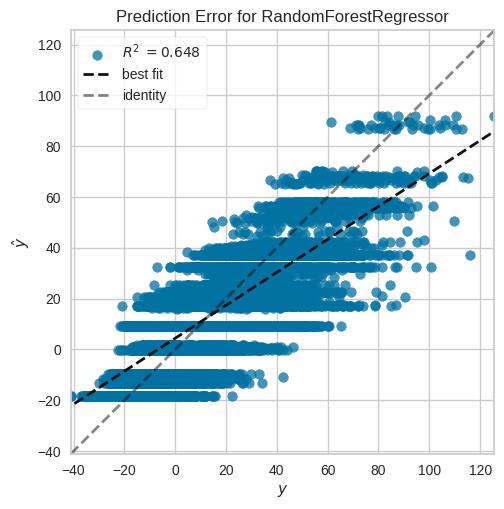

In [149]:
from yellowbrick.regressor import prediction_error

Visualizer = prediction_error(modelo, X_train, y_train, X_test, y_test);


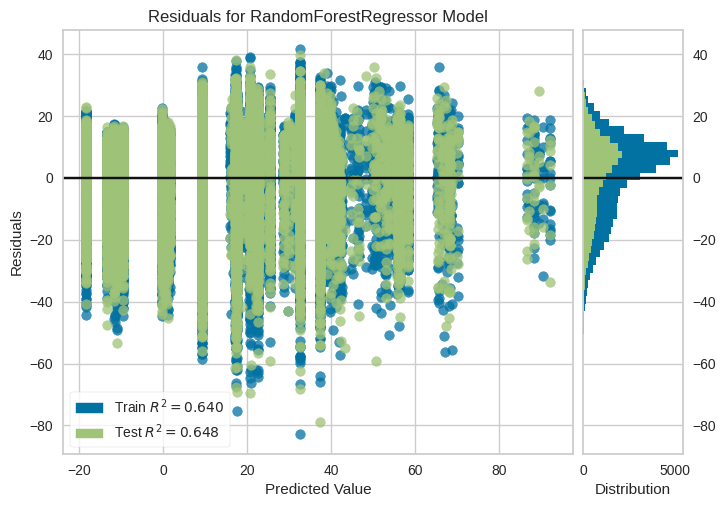

In [150]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(modelo, X_train, y_train, X_test, y_test);

In [151]:
from sklearn.model_selection import  KFold , cross_validate

scoring = {
    'RMSE' : 'neg_root_mean_squared_error',
    'MAE' : 'neg_mean_absolute_error',
    'R2' : 'r2'
}
cv = KFold(n_splits=5,shuffle=True, random_state=42)

cv_result = cross_validate(modelo, X_train, y_train, scoring=scoring, cv=cv)
cv_result

{'fit_time': array([4.36709976, 3.3027246 , 3.21536589, 3.33756351, 4.10819674]),
 'score_time': array([0.05995488, 0.05815673, 0.0556736 , 0.07873464, 0.05476189]),
 'test_RMSE': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528]),
 'test_MAE': array([-11.03252135, -11.13534968, -11.2094657 , -11.14503717,
        -11.25775565]),
 'test_R2': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267])}

#Clase  4


In [152]:
df.columns

Index(['schengen', 'arrival_time', 'is_holiday', 'delay', 'is_weekend',
       'airline_BZ', 'airline_MM', 'airline_YE', 'aircraft_type_Airbus A320',
       'aircraft_type_Airbus A330', 'aircraft_type_Boeing 737',
       'aircraft_type_Boeing 777', 'aircraft_type_Boeing 787',
       'aircraft_type_Embraer E175', 'origin_AUZ', 'origin_CNU', 'origin_CSF',
       'origin_EMM', 'origin_FJB', 'origin_MWL', 'origin_PUA', 'origin_TCY',
       'origin_TZF', 'origin_ZQO', 'day_name_Friday', 'day_name_Monday',
       'day_name_Saturday', 'day_name_Sunday', 'day_name_Thursday',
       'day_name_Tuesday', 'day_name_Wednesday'],
      dtype='object')

In [153]:
len(df.columns)

31

In [154]:
 importances =modelo.feature_importances_

In [155]:
feature_importances = pd.DataFrame({'Features': X.columns, 'Importances':(importances* 100).round(2)}).sort_values('Importances', ascending=False)
feature_importances

,Features,Importances
4,airline_BZ,53.03
2,is_holiday,14.59
7,aircraft_type_Airbus A320,10.07
8,aircraft_type_Airbus A330,5.76
12,aircraft_type_Embraer E175,4.59
1,arrival_time,3.60
11,aircraft_type_Boeing 787,2.64
20,origin_TCY,2.09
15,origin_CSF,1.60
19,origin_PUA,1.03


In [156]:
resultados = pd.DataFrame(index=['RMSE','MAE','R2'])
model_feautur= RandomForestRegressor(max_depth=5,random_state=42)
ct_feautur = [ i if  i != 0 else 1 for i in range(0,35,5) ]

for i  in ct_feautur:
  selected_features = feature_importances['Features'].values[:i]
  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]
  model_feautur.fit(X_train_selected,y_train)
  y_pred_feautur = model_feautur.predict(X_test_selected)
  metricas = calcular_metricas_regresion(y_test,y_pred_feautur)
  resultados[i] = list(metricas.values())


resultados

,1,5,10,15,20,25,30
RMSE,18.8331,15.1564,13.7587,13.7497,13.7498,13.7477,13.7479
MAE,14.9620,12.0605,11.0422,11.0285,11.0280,11.0261,11.0262
R2,0.3388,0.5718,0.6471,0.6476,0.6476,0.6477,0.6477


In [157]:
resultados = pd.DataFrame(index=['RMSE','MAE','R2'])
model_feautur= RandomForestRegressor(max_depth=5,random_state=42)
ct_feautur = range(10,16)

for i  in ct_feautur:
  selected_features = feature_importances['Features'].values[:i]
  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]
  model_feautur.fit(X_train_selected,y_train)
  y_pred_feautur = model_feautur.predict(X_test_selected)
  metricas = calcular_metricas_regresion(y_test,y_pred_feautur)
  resultados[i] = list(metricas.values())


resultados

,10,11,12,13,14,15
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476


In [158]:
selected_features = feature_importances['Features'].values[:13]
X_selected_features = X[selected_features]
X_selected_features

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,aircraft_type_Boeing 787,origin_TCY,origin_CSF,origin_PUA,origin_TZF,day_name_Friday,origin_MWL
0,0,0,1,0,0,8.885071,0,1,0,0,0,1,0
1,0,0,1,0,0,8.939996,0,1,0,0,0,1,0
2,1,0,0,0,1,18.635384,0,0,0,0,1,1,0
3,1,0,0,1,0,15.967963,0,0,0,0,0,1,0
4,1,0,0,1,0,16.571894,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,1,0,0,1,18.635384,0,0,0,0,1,0,0
71171,1,1,0,1,0,16.718722,0,0,0,0,0,0,0
71172,0,1,0,0,0,8.564949,1,0,0,0,1,0,0
71173,1,1,1,0,0,9.344097,0,0,0,0,0,0,0


In [159]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, test_size=0.3, random_state=42)

In [160]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf' : [1,2,3]
}

In [161]:
from sklearn.model_selection import GridSearchCV

cv = KFold(n_splits=5, shuffle=True, random_state=42)
model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, cv=cv, scoring='r2')
model_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [163]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 150}

In [164]:
y_pred_grid = model_grid.predict(X_test)
metricas_grid = calcular_metricas_regresion(y_test, y_pred_grid)
metricas_grid

{'Raíz del Error Cuadrático Medio': np.float64(13.2526),
 'Error Absoluto Medio': 10.6499,
 'R2 Score': 0.6726}

In [165]:
resultados['modelo_grid'] = list(metricas_grid.values())
resultados

,10,11,12,13,14,15,modelo_grid
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497,13.2526
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285,10.6499
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476,0.6726


In [168]:
import pickle

try:
    with open('champion.pkl', 'wb') as file:
        pickle.dump(model_grid.best_estimator_, file)
    print('modelo serializado con éxito')
except Exception as e:
    print(f'error al guardar el modelo: {e}')


modelo serializado con éxito
